# A Minimal Dash App

This code sets up a web application using `Dash`.

It loads data from a CSV file, allows users to select a country from a dropdown menu, and displays a dynamic line plot of population over time for the selected country.

The graph updates in real-time based on user input, thanks to the `callback` function.

### **Import necessary libraries**

- `Dash`: A Python web framework for building interactive web applications.

- `html` and `dcc` (Dash components): These are used for creating HTML elements and Dash components for the web interface.

- `callback`, `Output`, and `Input`: These are used to define callback functions for interactivity.

- `plotly.express`: This is used for creating interactive plots.

- `pandas`: This library is used for data manipulation.

In [1]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

### **Load Data**

- Data is loaded from a `CSV` file hosted on `GitHub` using `Pandas`.

- The data is stored in a DataFrame called `df`.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

df

country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
3308     Zimbabwe    Africa  1987   62.351   9216418  706.157306
3309     Zimbabwe    Africa  1992   60.377  10704340  693.420786
3310     Zimbabwe    Africa  1997   46.809  11404948  792.449960
3311     Zimbabwe    Africa  2002   39.989  11926563  672.038623
3312     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[3313 rows x 6 columns]

### **Create a Dash App**

- An instance of a Dash web application is created and named `app`.

In [3]:
app = Dash(__name__)

app

### **Define the layout of the web app**

- The layout of the web application is defined using HTML and Dash components.

- It consists of:

    - An `H1` HTML element displaying the title of the Dash app at the center of the page.

    - A `dcc.Dropdown` component allowing users to select a country from the dropdown.

    - A `dcc.Graph` component where the data visualization (initially empty) will be displayed.

In [4]:
app.layout = html.Div([
    html.H1(children='Year Wise Population', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'India', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

### **Define `Callback function` to update the graph based on `User Input`**

- A callback function is defined using the `@callback` decorator.

- This function is triggered when the value of the dropdown component (`'dropdown-selection'`) changes.

- The selected country is used to filter the DataFrame `df`, resulting in a new DataFrame called `dff` containing data only for the selected country.

- Plotly Express (`px`) is then used to create a line plot (`px.line`) of population (`'pop'`) over time (`'year'`).

- The line plot is returned as the `figure` property of the `Output` component (`'graph-content'`), which updates the graph on the web page.

In [5]:
@callback(
    Output('graph-content', 'figure'),  # Specify the output component (graph) and property to update
    Input('dropdown-selection', 'value')  # Specify the input component (dropdown) to trigger the callback
)
def update_graph(value):
    dff = df[df.country == value]  # Filter the DataFrame based on the selected country
    return px.line(dff, x='year', y='pop')  # Create a line plot using Plotly Express for the filtered data

### **Run the app**

- The `if __name__ == '__main__':` block ensures that the app runs only if this script is executed directly (not when it's imported as a module).

- The app is started with the `app.run(debug=True)` command, which runs the Dash app in debug mode.

In [6]:
if __name__ == '__main__':
    app.run(debug=True)

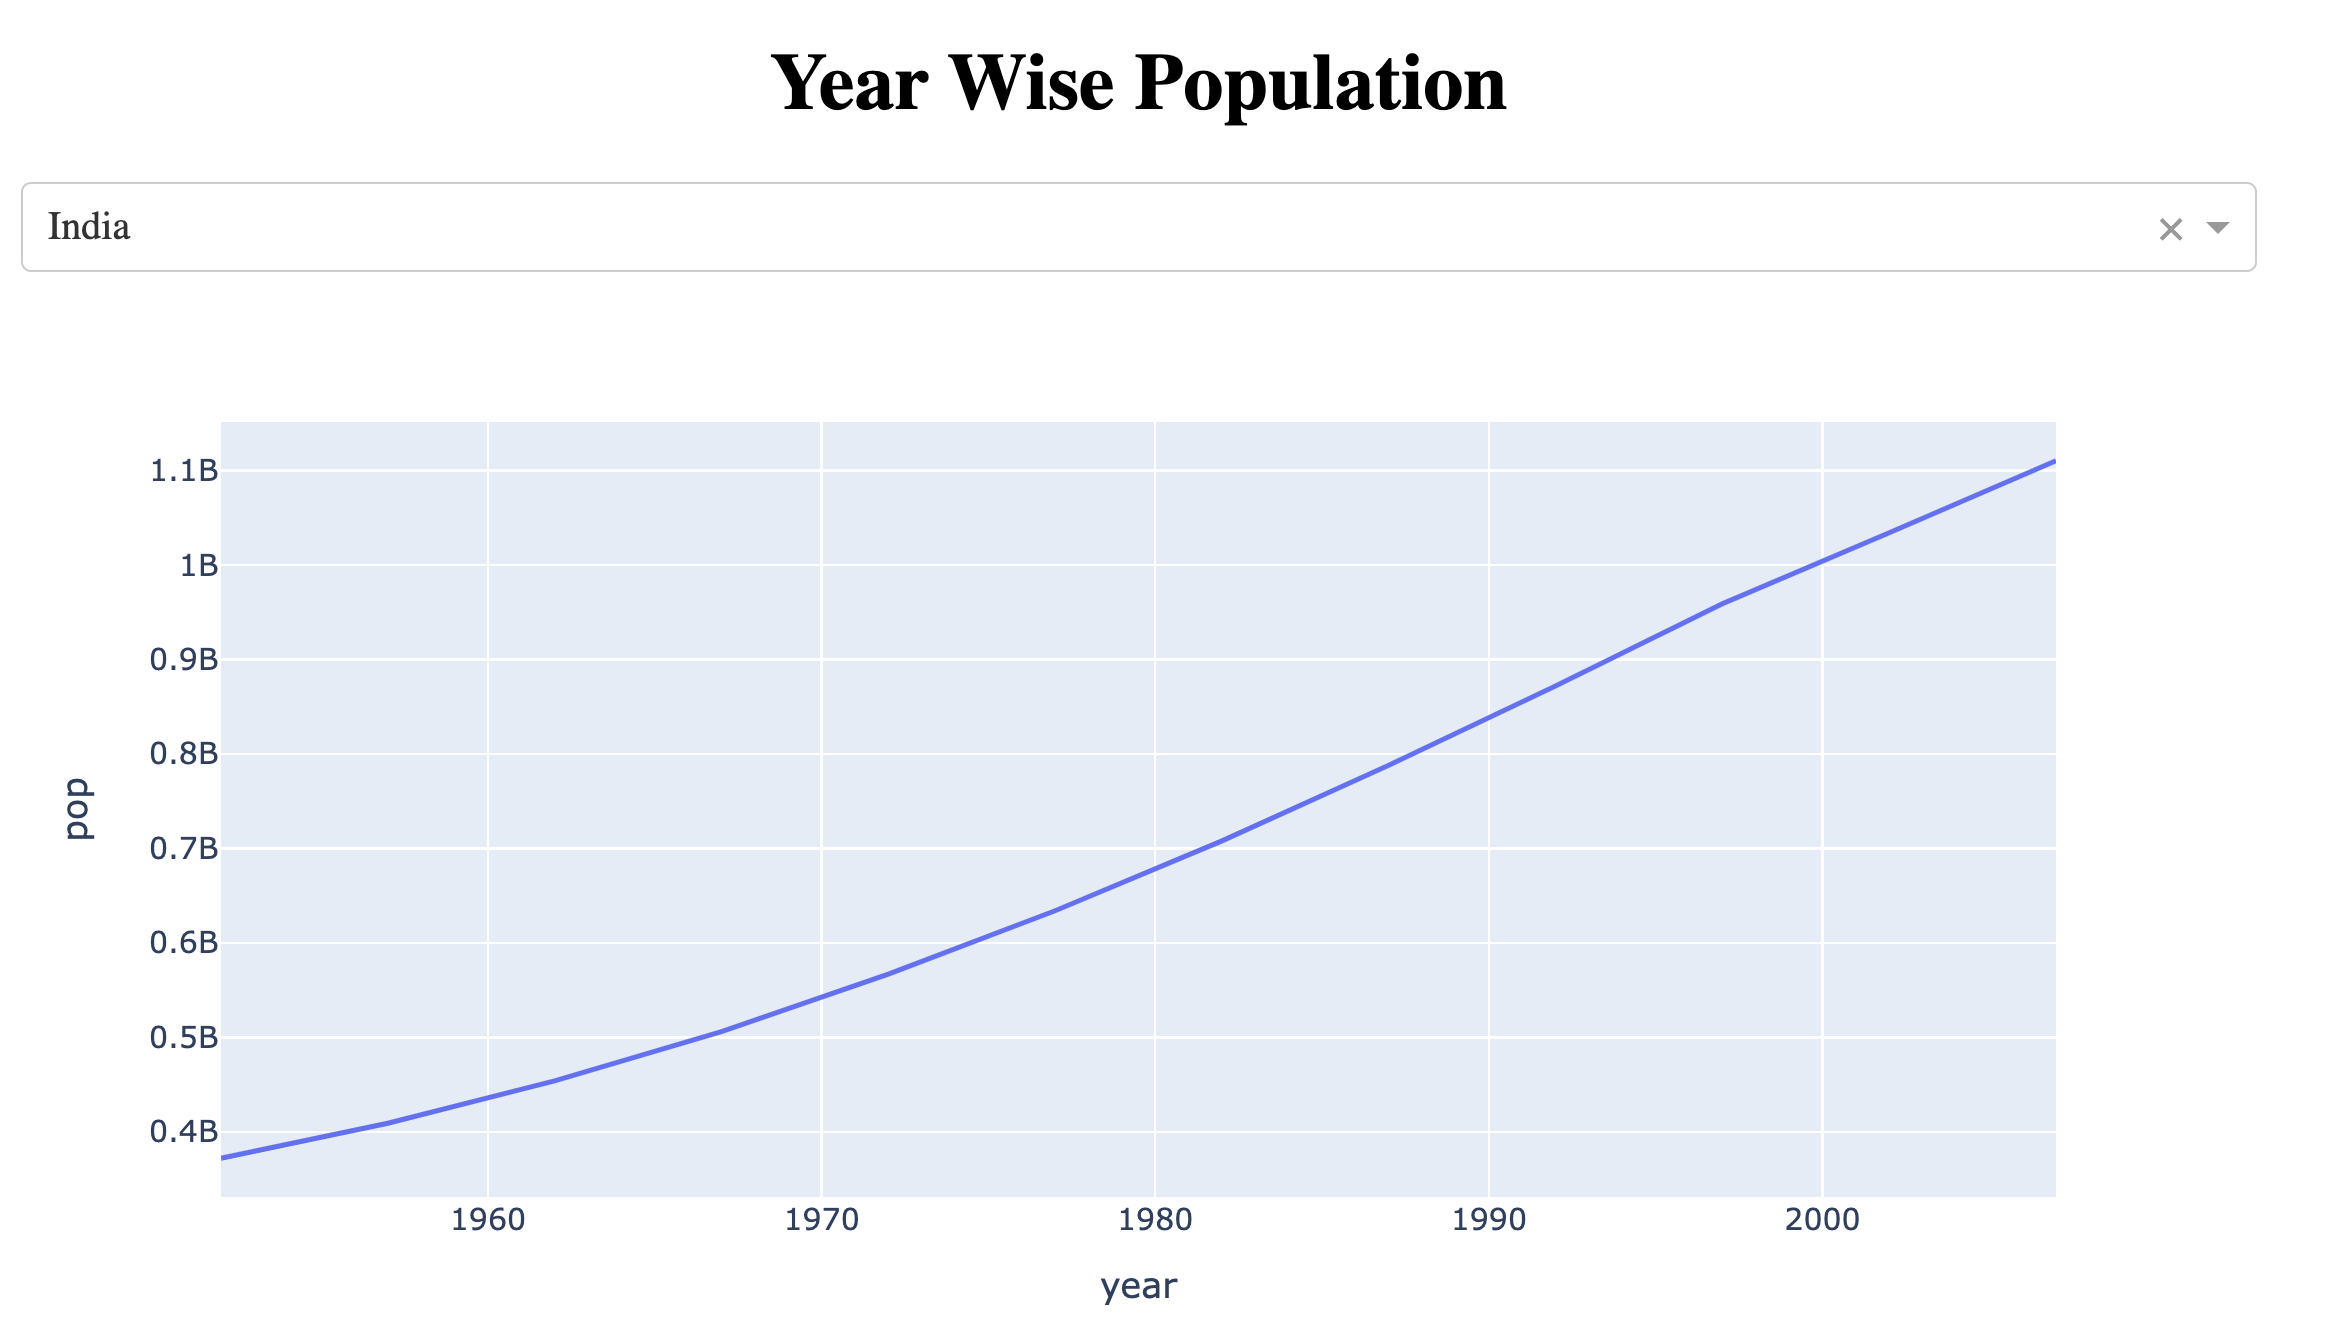

- To run the app, copy the above code into a new file named `app.py` and type into your terminal the command `python app.py`.

- Then, go to the http link. Dash is running on `http://127.0.0.1:8050/`

    - Serving Flask app 'app' (lazy loading)

    - Environment: production

    - WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.

    - Debug mode: on

    - Running on http://127.0.0.1:8050 (Press CTRL+C to quit)